In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
rand_a = np.random.uniform(0,100,size=(5,5))

In [4]:
rand_a

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [5]:
rand_b = np.random.uniform(0,100,size=(5,1))
rand_b

array([[ 99.43179012],
       [ 52.06653967],
       [ 57.87895355],
       [ 73.48190583],
       [ 54.19617722]])

In [6]:
a = tf.placeholder(tf.float32)

In [7]:
b = tf.placeholder(tf.float32)

In [8]:
sess = tf.InteractiveSession()

In [9]:
add_res = sess.run(a+b,feed_dict={a:rand_a,b:rand_b})

In [10]:
mul_res = sess.run(a*b,feed_dict={a:rand_a,b:rand_b})

In [11]:
print(add_res)
print("\n")
print(mul_res)

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]


[[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


# Example neural network

In [12]:
n_features = 10
n_dense_neurons = 3

In [13]:
x = tf.placeholder(tf.float32,(None,n_features))

In [14]:
theta1 = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
theta2 = tf.Variable(tf.ones([n_dense_neurons]))

In [15]:
xtheta = tf.matmul(x,theta1)

In [16]:
z = tf.add(xtheta,theta2)

In [17]:
a = tf.sigmoid(z)

In [18]:
init = tf.global_variables_initializer()

In [19]:
sess.run(init)

In [20]:
layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [21]:
print(layer_out)

[[ 0.19592889  0.84230143  0.36188066]]


# Simple Regresion

In [22]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [23]:
y_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

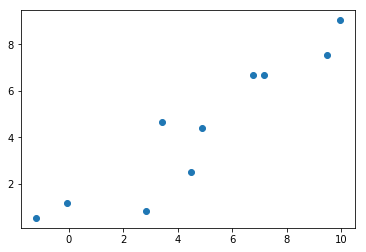

In [32]:
plt.plot(x_data,y_data,'o')

y = mx + b 

In [33]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [34]:
error = 0


In [40]:
for x,y in zip(x_data,y_data):
    y_cap = m*x + b
    error += (y-y_cap)**2
    

In [41]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [42]:
init = tf.global_variables_initializer()

In [50]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 100
    for i in range(training_steps):
        sess.run(train)
    print(sess.run([m,b]))    
    final_slope, final_intercept = sess.run([m,b])    

[0.75861382, 0.80002087]


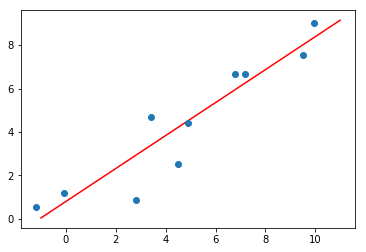

In [49]:
x_test = np.linspace(-1,11,10)

y_pred = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred,'r')
plt.plot(x_data,y_data,'o')